# Support Vector Regression (SVR)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

Import OSNIR Dataset and shuffle data

In [2]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [3]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Support Vector Regression Model

In [4]:
model = SVR(C=15, gamma=0.0011)
model.fit(x_train,y_train)

SVR(C=15, gamma=0.0011)

In [5]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [6]:
OSNIR_est = (model.predict(Input_num))

In [7]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[8.0, -1.0, 50.0, 25.0, 0.0, 9.0] => 22.930583 (expected 22.493447)
[9.0, 0.0, 100.0, 25.0, 0.0, 9.0] => 16.810838 (expected 16.544739)
[5.0, 3.0, 100.0, 25.0, 12.5, 9.0] => 18.912520 (expected 18.687954)
[19.0, -2.0, 10.0, 25.0, 0.0, 9.0] => 23.502436 (expected 23.847803)
[13.0, 0.0, 100.0, 50.0, 0.0, 9.0] => 13.570858 (expected 14.188573)
[38.0, -2.0, 100.0, 12.5, 0.0, 9.0] => 10.005469 (expected 10.176969)
[16.0, -3.0, 10.0, 12.5, 0.0, 9.0] => 22.510527 (expected 22.449645)
[9.0, -4.0, 100.0, 50.0, 0.0, 9.0] => 12.793897 (expected 12.357990)
[8.0, 3.0, 50.0, 25.0, 12.5, 9.0] => 18.392757 (expected 17.728248)
[5.0, 0.0, 100.0, 12.5, 0.0, 9.0] => 19.238853 (expected 17.758905)


In [8]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [9]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_SVR.csv",index=False)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00166722, 0.00033344, 0.00566856,
        0.006002  , 0.00966989, 0.009003  , 0.018006  , 0.02800934,
        0.03701234, 0.04401467, 0.05168389, 0.08569523, 0.20440147,
        0.20340113, 0.08736245, 0.06902301, 0.04901634, 0.03034345,
        0.01700567, 0.00766922, 0.00733578, 0.00500167, 0.00266756,
        0.00200067, 0.00133378, 0.00100033, 0.00033344, 0.00066689,
        0.00200067, 0.00133378, 0.00200067, 0.003001  , 0.00066689]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <BarContainer object of 40 artists>)

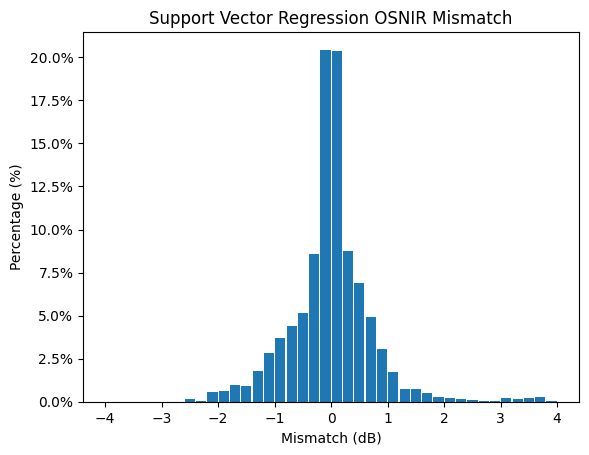

In [10]:
plt.title('Support Vector Regression OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-4,4),
         rwidth=0.9,
         bins=40,
         weights=np.ones(len(Mism))/len(Mism)
         )